<a href="https://colab.research.google.com/github/ykjoy/ML/blob/main/ann_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network




In [ ]:
# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## 데이터 준비

In [ ]:
# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(train_target)

[9 0 0 ... 3 0 5]


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


학습데이터 10개의 그림을 출력하기

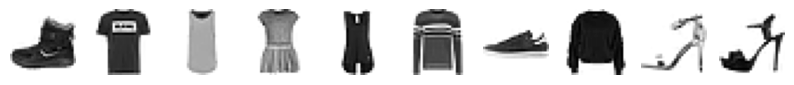

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10, figsize = (10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()


In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
class_names = ['티셔츠', '바지', '풀오버', '드레스', '코드', '샌달', '셔츠', '스니커즈', '가방', '부츠']

for i in range(10):
    print(class_names[train_target[i]], end = ",")

부츠,티셔츠,티셔츠,드레스,티셔츠,풀오버,스니커즈,풀오버,샌달,샌달,

In [ ]:
type(train_input)

numpy.ndarray

In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


데이터 정제

In [ ]:
train_scaled = train_input/255.0   # 학습데이터 입력값을 0~1사이로 변환
train_scaled = train_scaled.reshape(-1,28*28)   # 2차원을 1차원으로 펼쳐서 입력값으로 사용
test_scaled = test_input/255.0
test_scaled = test_scaled.reshape(-1,28*28)

## 입력과 출력층만 가지는 신경망 구성

Keras의 Sequential() 이용방법

* https://wikidocs.net/192931
* Sequential() 클래스를 사용하여 간단한 순차적인 구조를 가진 모델을 쉽게 구성할 수 있습니다. 즉, 입력층부터 출력층까지 차례대로 쌓아가는 것으로 모델을 구성합니다.
* Sequential 객체를 생성한 후, add() 메서드를 사용하여 입력층과 은닉층, 출력층(layer)을 추가할 수 있습니다. 케라스에서 제공하는 다양한 층들(Dense, Conv2D, MaxPooling2D, LSTM 등)을 사용하여 모델을 구성할 수 있습니다. 이후, compile() 메서드를 사용하여 모델을 컴파일합니다.


In [ ]:
'''
from keras.models import Sequential
from keras.layers import Dense

# 1. Sequential 모델 생성
model = Sequential()
# 2. 입력층과 은닉층 추가
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=32, activation='relu'))
# 3. 출력층 추가
model.add(Dense(units=10, activation='softmax'))

# model을 Sequential로 구현하는 다른 방법
# model = Sequential([
#   Dense(units=64, activation='relu', input_dim=100),
#   Dense(units=32, activation='relu'),
#   Dense(units=10, activation='softmax')
# ])
#`model.summary()`로 모델 구조를 확인하면 두 개가 같다는 것을 알 수 있습니다.

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
'''

In [ ]:
# 1. 입력과 출력층만 갖는 신경망 구조 생성 (분류 10개 클래스)
dense = keras.layers.Dense(10, activation = 'softmax', input_shape=(784,))
model = keras.Sequential([dense])  # 생성된 dense층 추가
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
#2. 위에서 구성된 신경망을 데이터를 사용해서 훈련
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5829 - accuracy: 0.8007
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4646 - accuracy: 0.8430
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4442 - accuracy: 0.8503
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4331 - accuracy: 0.8539
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4260 - accuracy: 0.8563


In [ ]:
# 3. 성능 평가하기
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.4676 - accuracy: 0.8416


[0.4676211476325989, 0.8416000008583069]

In [ ]:
# 세부 예측결과 확인
pred_detail =model.predict(test_scaled)  # 세부값 예측. 각 클래스별 확률로 출력됨. 슬라이싱 해서 일부만 하면 빠름[0:1]


313/313 [==============================] - 0s 1ms/step


In [ ]:
pred_index = np.argmax(pred_detail[0])  #가장 큰 인덱스 반환
print(class_names[pred_index])   # 첫번째 테스트데이터 예측결과 출력

부츠


In [ ]:
print(class_names[test_target[0]])

부츠


# Deep Neural Network


## 은닉층을 한 개 가지는 신경망 구성

In [ ]:
from tensorflow import keras

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 1. 데이터 입력 준비
train_scaled = train_input/255.0
test_scaled = test_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)
test_scaled = test_scaled.reshape(-1, 28*28)

# 2. 신경망 구성
dense1 = keras.layers.Dense(100, activation = 'relu', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')
model = keras.Sequential([dense1, dense2])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

# 3. 신경망 학습
model.fit(train_scaled, train_target, epochs = 5)

#4. 성능평가
model.evaluate(test_scaled, test_target)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5092 - accuracy: 0.8217
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3810 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3474 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3301 - accuracy: 0.8824
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8756


[0.3716799020767212, 0.8755999803543091]

## 과적합 방지 -드롭아웃

In [38]:
'''from tensorflow import keras

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 1. 데이터 입력 준비
train_scaled = train_input/255.0
test_scaled = test_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)
test_scaled = test_scaled.reshape(-1, 28*28)
'''

# 2. 신경망 구성
dense1 = keras.layers.Dense(100, activation = 'relu', input_shape = (784,))
######## 과적합 방지 - 드롭아웃 ##############
dense2 = keras.layers.Dropout(0.2)
dense3 =keras.layers.Dense(64, activation = 'relu')
dense4 = keras.layers.Dropout(0.2)
######################################
dense9 = keras.layers.Dense(10, activation = 'softmax')
model = keras.Sequential([dense1,dense2,dense3,dense4,dense5])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

# 3. 신경망 학습
model.fit(train_scaled, train_target, epochs = 5)

#4. 성능평가
model.evaluate(test_scaled, test_target)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 4.2774 - accuracy: 0.1121
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.1672 - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 4.1653 - accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.1623 - accuracy: 0.1000
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 4.1589 - accuracy: 0.1000


[4.1588897705078125, 0.10000000149011612]

## 과적합 방지 - 콜백

In [ ]:
'''from tensorflow import keras

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 1. 데이터 입력 준비
train_scaled = train_input/255.0
test_scaled = test_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)
test_scaled = test_scaled.reshape(-1, 28*28)

# 2. 신경망 구성
dense1 = keras.layers.Dense(100, activation = 'relu', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')
model = keras.Sequential([dense1, dense2])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
'''
######## 과적합 방지 - 콜백 ##############
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model')  ## 화일형식h5 대신 keras 이용
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
######################################
# 3. 신경망 학습
model.fit(train_scaled, train_target, epochs = 30, validation_data = (test_scaled,test_target), callbacks = [checkpoint_cb,early_stopping_cb])

print("조기종료: %f"   %(early_stopping_cb.stopped_epoch))
#4. 성능평가
model.evaluate(test_scaled, test_target)

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2529 - accuracy: 0.9129 - val_loss: 0.4156 - val_accuracy: 0.8828
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2484 - accuracy: 0.9145 - val_loss: 0.4682 - val_accuracy: 0.8756
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2446 - accuracy: 0.9152 - val_loss: 0.4089 - val_accuracy: 0.8843
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2422 - accuracy: 0.9180 - val_loss: 0.4269 - val_accuracy: 0.8804
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2383 - accuracy: 0.9194 - val_loss: 0.4421 - val_accuracy: 0.8798
조기종료: 4.000000
313/313 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8843


[0.40885770320892334, 0.8842999935150146]